New Notebook Machine Learning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("car-sales-extended-missing-data.csv")

In [3]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [4]:
df = pd.read_csv("car-sales-missing-data.csv")

In [5]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


Using RandomForestRegressor model to predict Price column


Convert `Price` column to int


In [22]:
df["Price"] = df["Price"].str.replace(",", "")

In [24]:
df["Price"] = pd.to_numeric(df["Price"], errors="coerce").astype("Int64")

In [25]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000
1,Honda,Red,87899.0,4.0,5000
2,Toyota,Blue,NaN,3.0,7000
3,BMW,Black,11179.0,5.0,22000
4,Nissan,White,213095.0,4.0,3500
5,Toyota,Green,NaN,4.0,4500
6,Honda,NaN,NaN,4.0,7500
7,Honda,Blue,NaN,4.0,<NA>
8,Toyota,White,60000.0,NaN,<NA>
9,NaN,White,31600.0,4.0,9700


In [28]:
df["Price"] = df["Price"].fillna(df["Price"].mean())

In [27]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000
1,Honda,Red,87899.0,4.0,5000
2,Toyota,Blue,NaN,3.0,7000
3,BMW,Black,11179.0,5.0,22000
4,Nissan,White,213095.0,4.0,3500
5,Toyota,Green,NaN,4.0,4500
6,Honda,NaN,NaN,4.0,7500
7,Honda,Blue,NaN,4.0,<NA>
8,Toyota,White,60000.0,NaN,<NA>
9,NaN,White,31600.0,4.0,9700


In [29]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000
1,Honda,Red,87899.0,4.0,5000
2,Toyota,Blue,NaN,3.0,7000
3,BMW,Black,11179.0,5.0,22000
4,Nissan,White,213095.0,4.0,3500
5,Toyota,Green,NaN,4.0,4500
6,Honda,NaN,NaN,4.0,7500
7,Honda,Blue,NaN,4.0,7900
8,Toyota,White,60000.0,NaN,7900
9,NaN,White,31600.0,4.0,9700


In [31]:
from sklearn.model_selection import train_test_split

##Split our data to training and testing data
y = df["Price"]
x = df.drop("Price", axis=1)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
x_train

,Make,Colour,Odometer,Doors
6,Honda,NaN,NaN,4.0
4,Nissan,White,213095.0,4.0
5,Toyota,Green,NaN,4.0
1,Honda,Red,87899.0,4.0
8,Toyota,White,60000.0,NaN
0,Toyota,White,150043.0,4.0
2,Toyota,Blue,NaN,3.0
3,BMW,Black,11179.0,5.0


Convert column values of Color and Make to Numeric use onehorod


In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
onehot = OneHotEncoder()

Fill in the Null values first of the columns `Colour` and `Odometer` using ColumnTransformer


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

Create imputers for numeric and non numeric columns


In [38]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000
1,Honda,Red,87899.0,4.0,5000
2,Toyota,Blue,NaN,3.0,7000
3,BMW,Black,11179.0,5.0,22000
4,Nissan,White,213095.0,4.0,3500
5,Toyota,Green,NaN,4.0,4500
6,Honda,NaN,NaN,4.0,7500
7,Honda,Blue,NaN,4.0,7900
8,Toyota,White,60000.0,NaN,7900
9,NaN,White,31600.0,4.0,9700


In [45]:
odometer_imputer = SimpleImputer(strategy="mean")

In [46]:
door_imputer = SimpleImputer(strategy="constant", fill_value=4.0)

In [48]:
colour_imputer = SimpleImputer(strategy="constant", fill_value="missing")

In [111]:
transformer = ColumnTransformer(
    [
        ("Odometer", odometer_imputer, ["Odometer"]),
        ("Colour", colour_imputer, ["Colour", "Make"]),
        ("Door", door_imputer, ["Doors"]),
    ],
    remainder="passthrough",
)

In [112]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Odometer', SimpleImputer(), ['Odometer']),
                                ('Colour',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['Colour', 'Make']),
                                ('Door',
                                 SimpleImputer(fill_value=4.0,
                                               strategy='constant'),
                                 ['Doors'])])

In [113]:
newdf = np.array(transformer.fit_transform(df))

In [98]:
newdf

array([[150043.0, 'White', 'Toyota', 4.0, 4000],
       [87899.0, 'Red', 'Honda', 4.0, 5000],
       [92302.66666666667, 'Blue', 'Toyota', 3.0, 7000],
       [11179.0, 'Black', 'BMW', 5.0, 22000],
       [213095.0, 'White', 'Nissan', 4.0, 3500],
       [92302.66666666667, 'Green', 'Toyota', 4.0, 4500],
       [92302.66666666667, 'missing', 'Honda', 4.0, 7500],
       [92302.66666666667, 'Blue', 'Honda', 4.0, 7900],
       [60000.0, 'White', 'Toyota', 4.0, 7900],
       [31600.0, 'White', 'missing', 4.0, 9700]], dtype=object)

In [99]:
newdf = pd.DataFrame(newdf, columns=["Odometer", "Colour", "Make", "Door", "Price"])

In [104]:
newdf

,Odometer,Colour,Make,Door,Price
0,150043.0,White,Toyota,4.0,4000
1,87899.0,Red,Honda,4.0,5000
2,92302.666667,Blue,Toyota,3.0,7000
3,11179.0,Black,BMW,5.0,22000
4,213095.0,White,Nissan,4.0,3500
5,92302.666667,Green,Toyota,4.0,4500
6,92302.666667,missing,Honda,4.0,7500
7,92302.666667,Blue,Honda,4.0,7900
8,60000.0,White,Toyota,4.0,7900
9,31600.0,White,missing,4.0,9700


In [114]:
untouch

,Odometer,Colour,Make,Door,Price
0,150043.0,White,Toyota,4.0,4000
1,87899.0,Red,Honda,4.0,5000
2,92302.666667,Blue,Toyota,3.0,7000
3,11179.0,Black,BMW,5.0,22000
4,213095.0,White,Nissan,4.0,3500
5,92302.666667,Green,Toyota,4.0,4500
6,92302.666667,missing,Honda,4.0,7500
7,92302.666667,Blue,Honda,4.0,7900
8,60000.0,White,Toyota,4.0,7900
9,31600.0,White,missing,4.0,9700


In [127]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000
1,Honda,Red,87899.0,4.0,5000
2,Toyota,Blue,NaN,3.0,7000
3,BMW,Black,11179.0,5.0,22000
4,Nissan,White,213095.0,4.0,3500
5,Toyota,Green,NaN,4.0,4500
6,Honda,NaN,NaN,4.0,7500
7,Honda,Blue,NaN,4.0,7900
8,Toyota,White,60000.0,NaN,7900
9,NaN,White,31600.0,4.0,9700


In [129]:
df = untouch

In [130]:
df

,Odometer,Colour,Make,Door,Price
0,150043.0,White,Toyota,4.0,4000
1,87899.0,Red,Honda,4.0,5000
2,92302.666667,Blue,Toyota,3.0,7000
3,11179.0,Black,BMW,5.0,22000
4,213095.0,White,Nissan,4.0,3500
5,92302.666667,Green,Toyota,4.0,4500
6,92302.666667,missing,Honda,4.0,7500
7,92302.666667,Blue,Honda,4.0,7900
8,60000.0,White,Toyota,4.0,7900
9,31600.0,White,missing,4.0,9700


In [136]:
encoder = OneHotEncoder(sparse_output == False, handle_unknown="ignore")

NameError: name 'sparse_output' is not defined

In [133]:
ed = encoder.fit_transform(df)

In [134]:
ed

<10x30 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [137]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [138]:
housing\

SyntaxError: incomplete input (82965533.py, line 1)

In [139]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [140]:
df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

In [141]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [142]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


ValueError: `bins` must increase monotonically, when an array

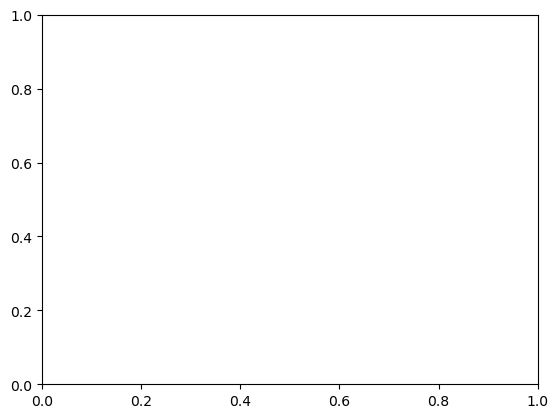

In [145]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(df["AveRooms"], df["Population"])

In [146]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [147]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [148]:
df["Target"] = housing.target

In [149]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [157]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [158]:
df["Target"] = housing["target"]

In [159]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [160]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [161]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [163]:
y = df["Target"]

In [164]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [165]:
x = df.drop("Target", axis=1)

In [166]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [167]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [169]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15454,2.7644,15.0,5.242718,1.098474,1632.0,2.263523,33.18,-117.29
4677,10.5860,52.0,8.508982,0.976048,495.0,2.964072,34.08,-118.34
17023,8.4693,26.0,6.993080,1.022491,1611.0,2.787197,37.52,-122.32
11024,4.8542,29.0,5.549618,0.900763,724.0,2.763359,33.79,-117.83
1843,4.4286,52.0,5.433538,1.022495,1131.0,2.312883,37.90,-122.29
...,...,...,...,...,...,...,...,...
10533,6.2661,4.0,6.290155,1.038860,959.0,2.484456,33.51,-117.68
14515,4.3598,5.0,4.694034,1.068418,5006.0,2.740011,32.89,-117.16
7405,2.1522,39.0,3.781302,1.048414,2323.0,3.878130,33.96,-118.21
927,6.8680,13.0,7.075000,0.978947,2759.0,3.630263,37.47,-121.91


In [170]:
y_train

15454    1.11400
4677     5.00001
17023    4.19200
11024    2.18100
1843     2.34900
          ...   
10533    2.68500
14515    1.89100
7405     1.55300
927      3.37300
3886     1.99800
Name: Target, Length: 16512, dtype: float64

In [171]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
model = RandomForestRegressor(n_estimators=500)

In [177]:
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [178]:
model.score(x_train, y_train)

0.9743625036902575

In [179]:
model.score(x_test, y_test)

0.7978854059767063

In [184]:
from sklearn.linear_model import Lasso

In [194]:
model = Lasso(alpha=0.5)

In [195]:
model.fit(x_train, y_train)

Lasso(alpha=0.5)

In [196]:
model.score(x_train, y_train)

0.46080211000889504

In [197]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()

In [198]:
model.fit(x_train, y_train)

ElasticNet()

In [199]:
model.score(x_train, y_train)

0.42937190786885004

In [200]:
model.score(x_test, y_test)

0.41492511055922454

In [216]:
np.random.seed(1)
model = RandomForestRegressor(n_estimators=100)

In [217]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [218]:
model.score(x_test, y_test)

0.7960647668105788

In [222]:
df = pd.read_csv("car-sales-extended-missing-data.csv")

In [220]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [221]:
df.dropna()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
994,BMW,Blue,163322.0,3.0,31666.0
995,Toyota,Black,35820.0,4.0,32042.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [223]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [227]:
x = df.drop("Price", axis=1)

In [228]:
y = df["Price"]

In [229]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [230]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [231]:
from sklearn.impute import SimpleImputer

In [232]:
from sklearn.compose import ColumnTransformer

In [249]:
door_imputer = SimpleImputer(strategy="constant", fill_value=4.0)

In [277]:
catergorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")

In [278]:
odometer_imputer=SimpleImputer(strategy=)

In [279]:
transformer = ColumnTransformer(
    [
        ("odometer", odometer_imputer, ["Odometer (KM)"]),
        ("Make", catergorical_imputer, ["Colour", "Make"]),
        ("doors", door_imputer, ["Doors"]),
    ],
    remainder="passthrough",
)

In [280]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('odometer', SimpleImputer(fill_value=1000.0),
                                 ['Odometer (KM)']),
                                ('Make',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['Colour', 'Make']),
                                ('doors',
                                 SimpleImputer(fill_value=4.0,
                                               strategy='constant'),
                                 ['Doors'])])

In [271]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [283]:
df = pd.read_csv("car-sales-extended-missing-data.csv")

In [284]:
x = df.drop("Price", axis=1)

In [288]:
transformed_x = transformer.fit_transform(x)

In [290]:
newdf = pd.DataFrame(transformed_x)

In [291]:
newdf

,0,1,2,3
0,35431.0,White,Honda,4.0
1,192714.0,Blue,BMW,5.0
2,84714.0,White,Honda,4.0
3,154365.0,White,Toyota,4.0
4,181577.0,Blue,Nissan,3.0
...,...,...,...,...
995,35820.0,Black,Toyota,4.0
996,155144.0,White,missing,3.0
997,66604.0,Blue,Nissan,4.0
998,215883.0,White,Honda,4.0


In [295]:
from sklearn.datasets import fetch_lfw_people

In [296]:
info = fetch_lfw_people()

In [297]:
dat = pd.read_csv("heart-disease.csv")

In [308]:
df = pd.read_csv("heart-disease.csv")

In [309]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [310]:
x = df.drop("target", axis=1)

In [311]:
y = df["target"]

In [323]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [324]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [334]:
from sklearn.model_selection import cross_val_score, train_test_split

In [335]:
from sklearn.ensemble import RandomForestClassifier

In [336]:
clf = RandomForestClassifier()

In [337]:
cross_val_score(clf, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.86666667, 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [338]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [340]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [341]:
y_preds = clf.predict(x_test)

In [342]:
y_preds

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [345]:
y_preds[:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [351]:
y_probs = clf.predict_proba(x_test)

In [352]:
y_positive = y_probs[:, 1]

In [353]:
y_positive

array([0.78, 0.06, 0.78, 0.82, 0.58, 0.09, 0.83, 1.  , 0.7 , 0.38, 0.65,
       0.58, 0.12, 0.55, 0.32, 0.22, 0.  , 0.12, 0.05, 0.46, 0.98, 0.4 ,
       0.58, 0.19, 1.  , 0.56, 0.22, 0.03, 0.62, 0.64, 0.27, 0.75, 0.7 ,
       0.68, 0.24, 0.98, 0.74, 0.03, 0.8 , 0.01, 0.52, 0.46, 0.71, 0.15,
       0.85, 0.38, 0.79, 0.73, 0.14, 0.81, 0.06, 0.74, 0.99, 0.62, 0.13,
       0.79, 0.51, 0.08, 0.71, 0.82, 0.04])

In [354]:
y_false = y_probs[:, 0]

In [355]:
y_false

array([0.22, 0.94, 0.22, 0.18, 0.42, 0.91, 0.17, 0.  , 0.3 , 0.62, 0.35,
       0.42, 0.88, 0.45, 0.68, 0.78, 1.  , 0.88, 0.95, 0.54, 0.02, 0.6 ,
       0.42, 0.81, 0.  , 0.44, 0.78, 0.97, 0.38, 0.36, 0.73, 0.25, 0.3 ,
       0.32, 0.76, 0.02, 0.26, 0.97, 0.2 , 0.99, 0.48, 0.54, 0.29, 0.85,
       0.15, 0.62, 0.21, 0.27, 0.86, 0.19, 0.94, 0.26, 0.01, 0.38, 0.87,
       0.21, 0.49, 0.92, 0.29, 0.18, 0.96])

In [356]:
from sklearn.metrics import roc_curve

In [358]:
fpr, tpr, thresholds = roc_curve(y_test, y_positive)

In [359]:
tpr

array([0.        , 0.07407407, 0.11111111, 0.18518519, 0.25925926,
       0.33333333, 0.37037037, 0.37037037, 0.51851852, 0.51851852,
       0.55555556, 0.55555556, 0.62962963, 0.62962963, 0.62962963,
       0.7037037 , 0.74074074, 0.85185185, 0.85185185, 0.88888889,
       0.92592593, 0.92592593, 0.96296296, 0.96296296, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [360]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02941176, 0.02941176, 0.05882353,
       0.08823529, 0.11764706, 0.11764706, 0.17647059, 0.20588235,
       0.20588235, 0.23529412, 0.23529412, 0.32352941, 0.32352941,
       0.35294118, 0.38235294, 0.41176471, 0.47058824, 0.47058824,
       0.52941176, 0.64705882, 0.70588235, 0.76470588, 0.82352941,
       0.88235294, 0.94117647, 1.        ])

In [361]:
thresholds

array([ inf, 1.  , 0.99, 0.98, 0.83, 0.82, 0.81, 0.8 , 0.78, 0.75, 0.74,
       0.73, 0.71, 0.7 , 0.68, 0.64, 0.62, 0.58, 0.52, 0.51, 0.46, 0.4 ,
       0.38, 0.27, 0.24, 0.22, 0.13, 0.12, 0.08, 0.06, 0.04, 0.03, 0.  ])

In [362]:
from sklearn.metrics import classification_report

In [364]:
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.88      0.68      0.77        34\n           1       0.69      0.89      0.77        27\n\n    accuracy                           0.77        61\n   macro avg       0.79      0.78      0.77        61\nweighted avg       0.80      0.77      0.77        61\n'

In [365]:
from sklearn.metrics import roc_curve

In [366]:
y_positive

array([0.78, 0.06, 0.78, 0.82, 0.58, 0.09, 0.83, 1.  , 0.7 , 0.38, 0.65,
       0.58, 0.12, 0.55, 0.32, 0.22, 0.  , 0.12, 0.05, 0.46, 0.98, 0.4 ,
       0.58, 0.19, 1.  , 0.56, 0.22, 0.03, 0.62, 0.64, 0.27, 0.75, 0.7 ,
       0.68, 0.24, 0.98, 0.74, 0.03, 0.8 , 0.01, 0.52, 0.46, 0.71, 0.15,
       0.85, 0.38, 0.79, 0.73, 0.14, 0.81, 0.06, 0.74, 0.99, 0.62, 0.13,
       0.79, 0.51, 0.08, 0.71, 0.82, 0.04])

In [367]:
fpr, tpr, thresholds = roc_curve(y_test, y_positive)

In [368]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02941176, 0.02941176, 0.05882353,
       0.08823529, 0.11764706, 0.11764706, 0.17647059, 0.20588235,
       0.20588235, 0.23529412, 0.23529412, 0.32352941, 0.32352941,
       0.35294118, 0.38235294, 0.41176471, 0.47058824, 0.47058824,
       0.52941176, 0.64705882, 0.70588235, 0.76470588, 0.82352941,
       0.88235294, 0.94117647, 1.        ])

ValueError: '---' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

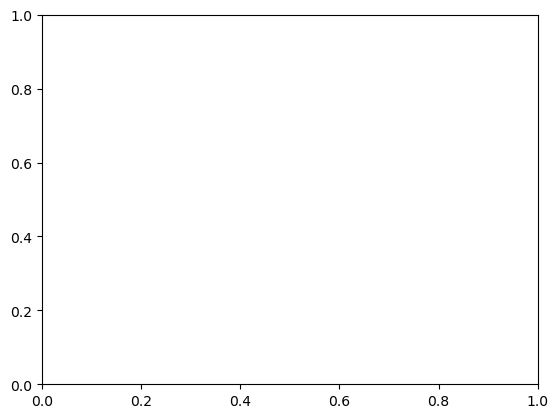

In [374]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color="yellow", label="roc_curve", linestyle="---")
plt.plot([0, 0], [1, 1])

In [375]:
from sklearn.metrics import confusion_matrix

In [376]:
confusion_matrix(y_test, y_preds)

array([[23, 11],
       [ 3, 24]], dtype=int64)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("car-sales-extended-missing-data.csv")

In [3]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [4]:
x = df.drop("Price", axis=1)
y = df["Price"]

**Clean up the data**
1. Fill up or drop the na values
2. Convert categorical features to numeric features as we are gonna implement a regression model

In [5]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [6]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64

**Impute Values**

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [9]:
df.keys()

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [10]:
door_imputer = SimpleImputer(strategy="constant", fill_value=4.0)

In [11]:
odometer_imputer = SimpleImputer(strategy="mean")

In [12]:
catergorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")

**Fit the imputers into the model and transform it using ColumnTransformer**

In [13]:
transformer = ColumnTransformer(
    [
        ("categories", catergorical_imputer, ["Make", "Colour"]),
        ("odometer_imputer", odometer_imputer, ["Odometer (KM)"]),
        ("door_imputer", door_imputer, ["Doors"]),
    ],
    remainder="passthrough",
)

In [19]:
imputed_x = transformer.fit_transform(x)

**After imputing Na values we have to now convert categorical features to numeric features to carry out regression**

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
onehot = OneHotEncoder()

In [18]:
transformer = ColumnTransformer(
    [("onehot", onehot, ["Make", "Colour"])], remainder="passthrough"
)

In [23]:
new_x = pd.DataFrame(imputed_x)

In [24]:
new_x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35431.0,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,192714.0,5.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84714.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,154365.0,4.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,181577.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35820.0,4.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,155144.0,3.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66604.0,4.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,215883.0,4.0


In [25]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64

**Now split the data into test and training data**

In [26]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2)

In [58]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
453,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,157782.0,4.0
798,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,48777.0,4.0
33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,153554.0,3.0
461,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,143651.0,5.0
526,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110362.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,161712.0,4.0
392,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,227387.0,4.0
742,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,228678.0,5.0
133,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,125802.0,4.0


In [38]:
np.shape(x_train)

(800, 13)

In [59]:
np.shape(x_test)

(200, 13)

**Now fit the data into a regression model and experiment and improve upon your model**

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor()

In [48]:
transformer_y = ColumnTransformer(
    [("fillprices", SimpleImputer(strategy="mean"), ["Price"])], remainder="passthrough"
)

In [54]:
y = pd.DataFrame(y, columns=["Price"])

In [55]:
y

,Price
0,15323.0
1,19943.0
2,28343.0
3,13434.0
4,14043.0
...,...
995,32042.0
996,5716.0
997,31570.0
998,4001.0


In [61]:
y = y.fillna(y["Price"].mean)

In [62]:
y

,Price
0,15323.0
1,19943.0
2,28343.0
3,13434.0
4,14043.0
...,...
995,32042.0
996,5716.0
997,31570.0
998,4001.0


In [65]:
y_train

,Price
771,19271.0
306,10740.0
22,22489.0
20,24130.0
430,13310.0
...,...
842,13474.0
787,11036.0
346,25649.0
350,17597.0


In [66]:
model.fit(x_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


TypeError: float() argument must be a string or a real number, not 'method'

In [67]:
type(y_train)

pandas.core.frame.DataFrame

In [68]:
type(x_train)

pandas.core.frame.DataFrame

In [74]:
y_test = y_test["Price"]

In [75]:
y_test

666     9402.0
473    16226.0
533     6742.0
352    10301.0
401    15879.0
        ...   
870    18962.0
26     13344.0
389     7598.0
438    11076.0
612    16774.0
Name: Price, Length: 200, dtype: object

In [73]:
y_test

,Price
666,9402.0
473,16226.0
533,6742.0
352,10301.0
401,15879.0
...,...
870,18962.0
26,13344.0
389,7598.0
438,11076.0


In [76]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,136340.0,4.0
306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,108681.0,4.0
22,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,148744.0,4.0
20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,124844.0,4.0
430,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45668.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,209485.0,4.0
787,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,245977.0,4.0
346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40749.0,4.0
350,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,191658.0,4.0


In [77]:
model.fit(x_train, y_train)

TypeError: float() argument must be a string or a real number, not 'method'

In [80]:
x_test = np.array(x_test)

In [83]:
type(x_test)

numpy.ndarray

In [86]:
y_train = np.array(y_train)

In [88]:
type(x_train)

numpy.ndarray

In [90]:
y_test = np.array(y_test)

In [91]:
type(x_test)

numpy.ndarray

In [92]:
np.shape(x_train)

(800, 13)

In [93]:
x_train

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.36340e+05, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.08681e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.48744e+05, 4.00000e+00],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.07490e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.91658e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.37190e+05, 4.00000e+00]])

In [94]:
y_train

array([19271.0, 10740.0, 22489.0, 24130.0, 13310.0, 12216.0, 10676.0,
       16416.0, 10646.0, 8690.0, 6568.0, 26885.0, 12353.0,
       <bound method Series.mean of 0      15323.0
       1      19943.0
       2      28343.0
       3      13434.0
       4      14043.0
               ...
       995    32042.0
       996     5716.0
       997    31570.0
       998     4001.0
       999    12732.0
       Name: Price, Length: 1000, dtype: float64> , 17152.0, 12398.0,
       26308.0, 29876.0, 13492.0, 7898.0, 4454.0, 27146.0, 13430.0,
       22949.0, 8786.0, 21851.0, 10919.0, 48419.0, 4946.0, 5332.0,
       22436.0, 16517.0, 14849.0, 8500.0, 10024.0, 5383.0, 16223.0,
       <bound method Series.mean of 0      15323.0
       1      19943.0
       2      28343.0
       3      13434.0
       4      14043.0
               ...
       995    32042.0
       996     5716.0
       997    31570.0
       998     4001.0
       999    12732.0
       Name: Price, Length: 1000, dtype: float64> , 6283.0, 12

In [95]:
model.fit(x_train, y_train)

TypeError: float() argument must be a string or a real number, not 'method'

In [100]:
x = new_x

In [97]:
y

,Price
0,15323.0
1,19943.0
2,28343.0
3,13434.0
4,14043.0
...,...
995,32042.0
996,5716.0
997,31570.0
998,4001.0


In [99]:
y.dropna()

,Price
0,15323.0
1,19943.0
2,28343.0
3,13434.0
4,14043.0
...,...
995,32042.0
996,5716.0
997,31570.0
998,4001.0


In [101]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35431.0,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,192714.0,5.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84714.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,154365.0,4.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,181577.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35820.0,4.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,155144.0,3.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66604.0,4.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,215883.0,4.0


In [106]:
y

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]])

In [104]:
y = np.array(y)

In [107]:
x = np.array(x)

In [108]:
x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]])

In [109]:
model.fit(x, y)

ValueError: Input y contains NaN.

In [110]:
y

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]])

In [1]:
from joblib import load

In [4]:
model = load("firstmodel.joblib")

In [5]:
model

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=100,
                                                    max_leaf_nodes=5,
                                                    n_estimators=500,
                                                    n_jobs=1),
                   n_iter=5,
                   param_distributions={'max_depth': [100, 200, 300, 400, 500],
                                        'max_features': ['sqrt'],
                                        'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                                        'n_estimators': [500, 600, 700],
                                        'n_jobs': [1, 2, 3, 4, 5]},
                   verbose=2)

In [6]:
model.best_score_

0.797704081632653

In [7]:
model.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=100,
                                                    max_leaf_nodes=5,
                                                    n_estimators=500,
                                                    n_jobs=1),
                   n_iter=5,
                   param_distributions={'max_depth': [100, 200, 300, 400, 500],
                                        'max_features': ['sqrt'],
                                        'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                                        'n_estimators': [500, 600, 700],
                                        'n_jobs': [1, 2, 3, 4, 5]},
                   verbose=2)>

In [11]:
model.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=100,
                                                    max_leaf_nodes=5,
                                                    n_estimators=500,
                                                    n_jobs=1),
                   n_iter=5,
                   param_distributions={'max_depth': [100, 200, 300, 400, 500],
                                        'max_features': ['sqrt'],
                                        'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                                        'n_estimators': [500, 600, 700],
                                        'n_jobs': [1, 2, 3, 4, 5]},
                   verbose=2)>

In [12]:
from joblib import load

In [13]:
model = load("firstmodel.joblib")

In [14]:
model.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=100,
                                                    max_leaf_nodes=5,
                                                    n_estimators=500,
                                                    n_jobs=1),
                   n_iter=5,
                   param_distributions={'max_depth': [100, 200, 300, 400, 500],
                                        'max_features': ['sqrt'],
                                        'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                                        'n_estimators': [500, 600, 700],
                                        'n_jobs': [-1]},
                   verbose=2)>